# Feature Scaling

In this notebook, we will use the [Pima Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) from the UCI Machine Learning Database to learn how to scale feature data. Scaling means to change the range of values for the data so that features (columns) that have vastly different numerical ranges can be more easily compared. We will look at 2 types of scaling - z-score standardization and Min-max scaling.

In [57]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [58]:
filepath = "datasets/DC_Properties.csv"

pima_df = pd.read_csv(filepath)
pima_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [59]:
#check if any missing values in the data
pima_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [60]:
#descriptive statistics
pima_df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E1E3615C0>,
      dtype=object)

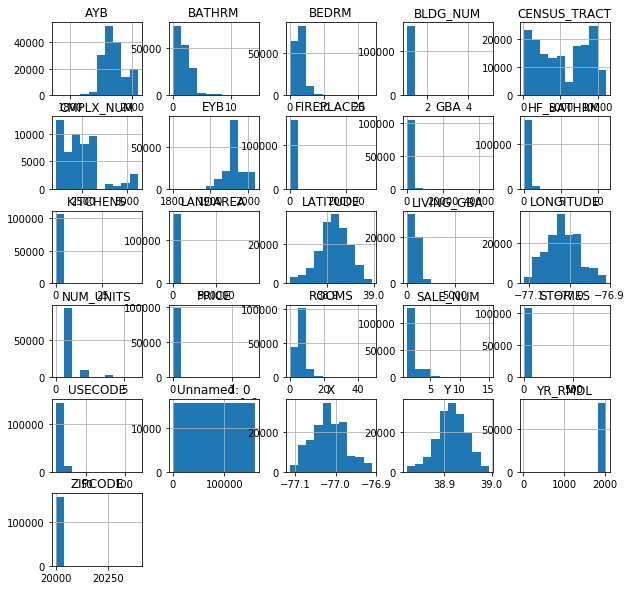

In [61]:
#plot the frequency count for each column
pima_df.hist(figsize=(10,10))

We can see from the descriptive statistics and the frequency distribution plots that each feature (column) has varying ranges. Features such as Insulin have a high maximum value but other features like DiabetesPedigreeFunction have low maximum values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E1898FA20>,
      dtype=object)

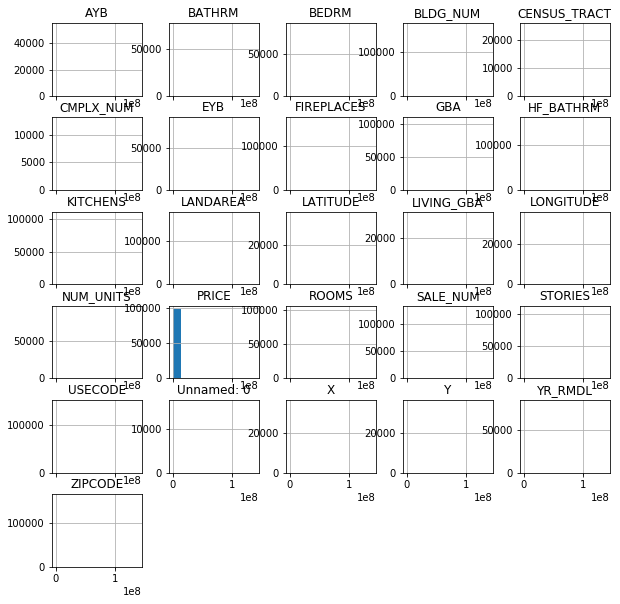

In [62]:
#plot frequency count data but using the same scale (minimum and maximum value out of all columns)
pima_df.hist(figsize=(10,10), sharex=True)

**Scaling will help to find any drastic effects that occur in the data when comparing multiple features. If we try to see any effects when putting the features on the same scale in the default data, as in the above charts, smaller values cannot be seen.**

### Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.
### \begin{align}  z = \frac{(value - mean)}{std dev} \end{align}

In [63]:
#first 5 rows of the 'Glucose' column
#pima_df['Glucose'].head()
pima_df['PRICE'].head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [64]:
pima_df['PRICE'] = pima_df['PRICE'].fillna(value = pima_df['PRICE'].mean())

In [65]:
pima_df['PRICE'].isnull().sum()

0

In [66]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['PRICE'].mean()

#standard deviation of the column
std = pima_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['PRICE'] - mean)/std

In [67]:
#values for mean and standard deviation of 'Glucose column'
mean, std

(931351.5949342768, 5550558.004606821)

In [68]:
#first 5 rows of z-score standardized 'Glucose' column
glucose_z_manual.head()

0    2.948323e-02
1   -1.191092e-13
2    2.105461e-01
3    1.208254e-01
4   -1.191092e-13
Name: PRICE, dtype: float64

In [69]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
glucose_zscore = scaler.fit_transform(pima_df[['PRICE']])

In [70]:
#mean and standard deviation of z-score standardized 'Glucose' column
glucose_zscore.mean(), glucose_zscore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [71]:
glucose_zscore[:5] 

array([[2.94833276e-02],
       [2.09736909e-17],
       [2.10546774e-01],
       [1.20825783e-01],
       [2.09736909e-17]])

In [72]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
#reshape(-1) change 2D into 1D
glu_z_col = pd.Series(glucose_zscore.reshape(-1))

In [73]:
#first 5 rows of z-score standardized glucose column
glu_z_col.head()

0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
dtype: float64

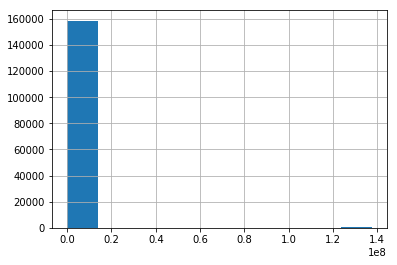

In [74]:
#BEFORE: frequency count plot of 'Glucose' column
pima_df['PRICE'].hist()

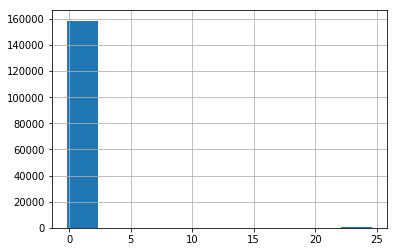

In [75]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
glu_z_col.hist()

In [76]:
#show z-score standardization for all columns

#list to hold column names
#colnames = list(pima_df.columns)
#colnames = glu_z_col.columns

#calculate z-scores
#zscore_df = pd.DataFrame(scaler.fit_transform(pima_df), columns = colnames)#
#zscore_df = pd.DataFrame(scaler.fit_transform([glu_z_col]), columns = ['z score'])

#plot frequency distribution with same scale range
#zscore_df.hist(figsize=(10,10), sharex=True)

### Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

### \begin{align}  m = \frac{(value - min)}{max - min} \end{align}

In [77]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [78]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
glucose_minmax = minmax_sc.fit_transform(pima_df[['PRICE']])

In [79]:
#mean and standard deviation of Min-Max 'Glucose' column
glucose_minmax.mean(), glucose_minmax.std()

(0.0067770300467104, 0.04038885061696727)

In [80]:
glucose_minmax[:5]

array([[0.00796783],
       [0.00677703],
       [0.01528077],
       [0.01165704],
       [0.00677703]])

In [81]:
pima_df['PRICE'] = pima_df['PRICE'].fillna(value = pima_df['PRICE'].mean())

In [82]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
#reshape(-1) change 2D into 1D
glu_mm_col = pd.Series(glucose_minmax.reshape(-1))
glu_mm_col.head()

0    0.007968
1    0.006777
2    0.015281
3    0.011657
4    0.006777
dtype: float64

In [83]:
#verify the range is between 0 and 1
glu_mm_col.min(), glu_mm_col.max()

(0.0, 0.9999999999999999)

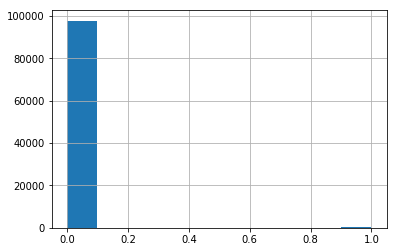

In [28]:
glu_mm_col.hist()

### Tips for Predictive Models

- Z-score standardization is most useful for regression models, such as linear regression and logistic regression
- Min-Max scaling is more relevant for algorithms that calculate distances between data points, such as K-Nearest Neighbors and K-Means Clustering